# EDA on Netflix Movies and TV Shows Dataset

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [94]:
df=pd.read_excel("netflix_titles.xlsx")

## Data Cleaning and Overview

In [95]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [96]:
df.shape

(8807, 12)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [98]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [99]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

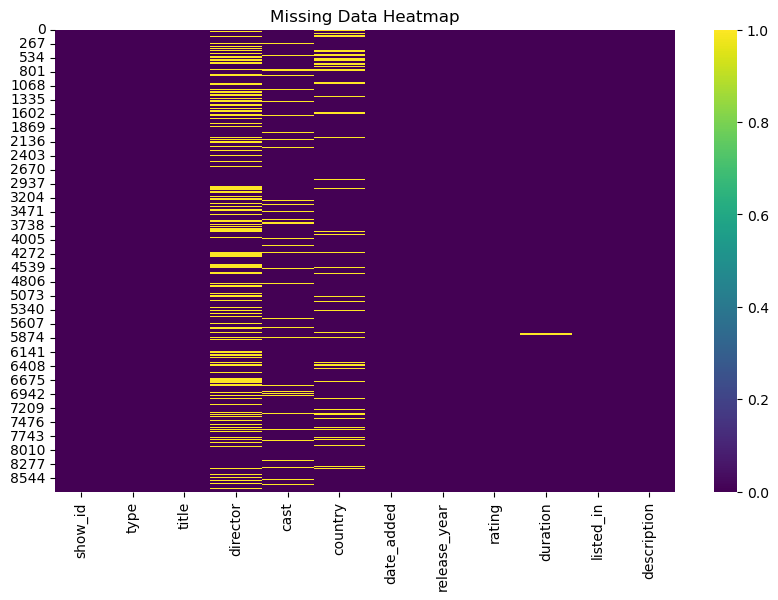

In [100]:
#Visualize missing data

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
# Fill simple missing values and convert data types
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('Unknown')

### Movies vs TV Shows Distribution

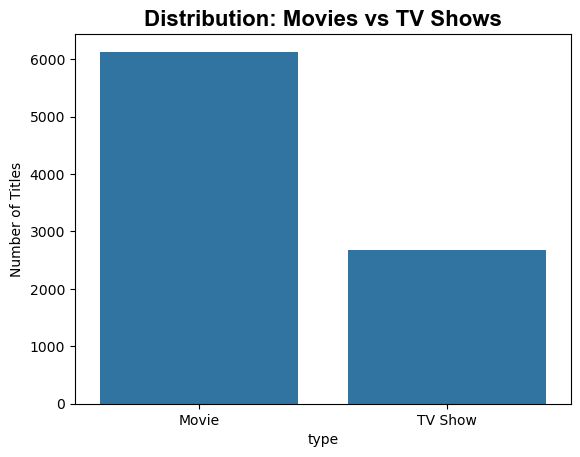

In [103]:
sns.countplot(x='type',data=df) #Shows the count of total movies and TV shows
style=dict(fontsize=16, family='Arial', fontweight='bold') #assigning a dictionary in a variable
plt.title("Distribution: Movies vs TV Shows", **style)
plt.ylabel("Number of Titles")
plt.show()

### Release Year Trends

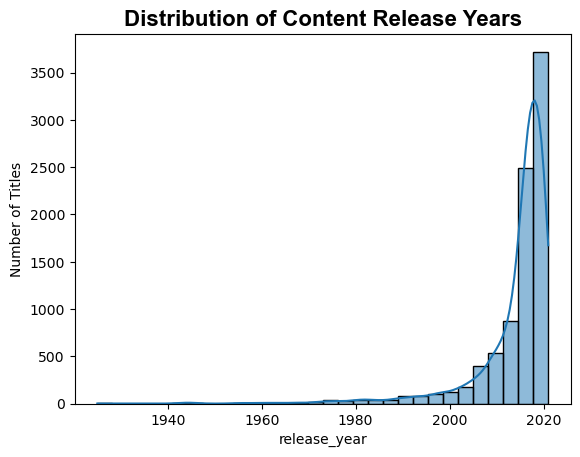

In [104]:
sns.histplot(df['release_year'], bins=30, kde=True)    #histogram plot to show no. of contents/titles per year
plt.title("Distribution of Content Release Years", **style) 
plt.ylabel("Number of Titles")
plt.show()

### 

### Rating Distribution

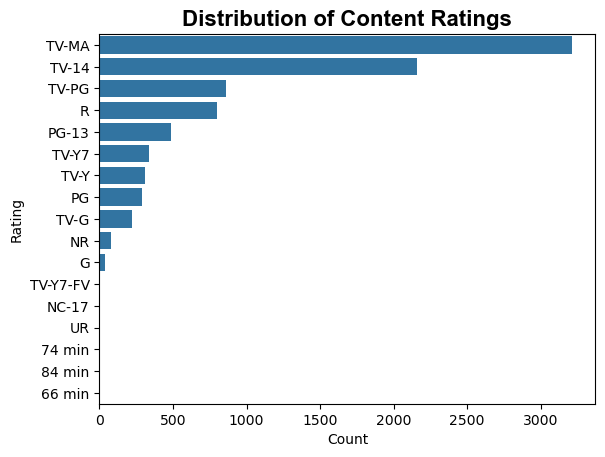

In [105]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings", **style)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

### Genre Analysis

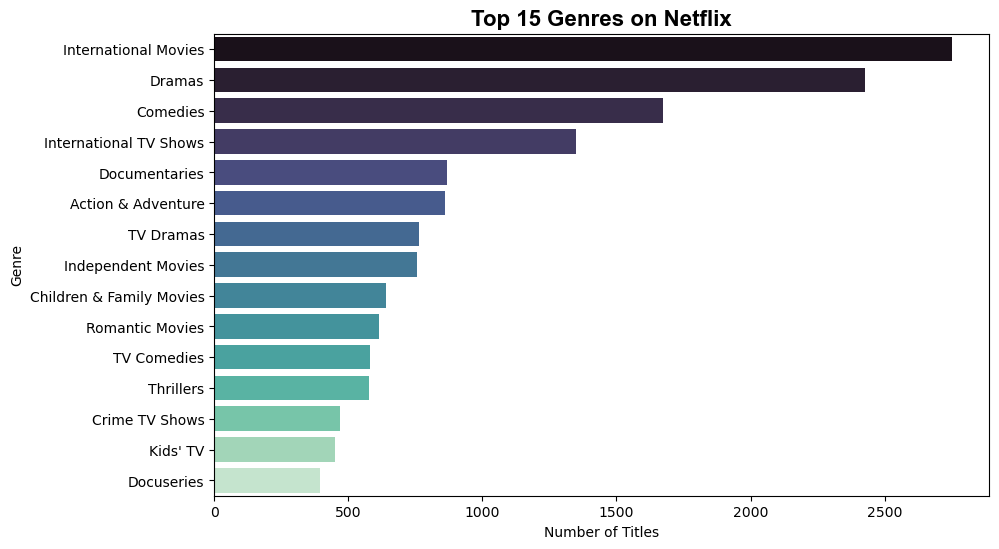

In [106]:
genres = df['listed_in'].dropna().apply(lambda x: x.split(','))
genre_list = [g.strip() for sublist in genres for g in sublist]
genre_counts = pd.Series(genre_list).value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='mako', legend=False)
plt.title("Top 15 Genres on Netflix", **style)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

### Country-wise Availability

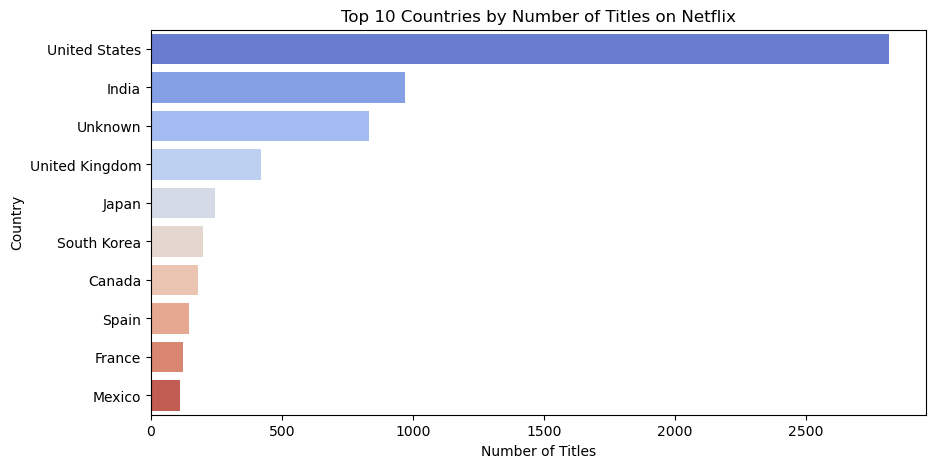

In [107]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

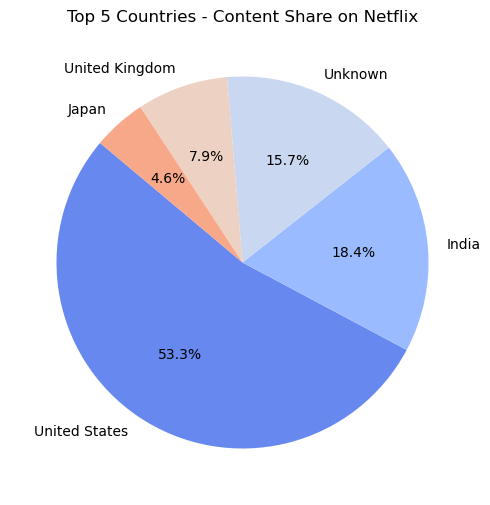

In [108]:
# Pie chart for top 5 countries
plt.figure(figsize=(6,8))
plt.pie(top_countries.head(5).values, labels=top_countries.head(5).index, 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title("Top 5 Countries - Content Share on Netflix")
plt.show()

## Key Insights from Netflix EDA

### 1️⃣ Movies dominate over TV Shows on Netflix.
### 2️⃣ Content additions increased sharply after 2015.
### 3️⃣ The United States and India are top contributors to Netflix content.
### 4️⃣ Most content is rated for mature or teen audiences (TV-MA, TV-14).
### 5️⃣ Drama, Comedy, and Documentaries are the most popular genres.